#### Question 6 : Ajout de sauts au modèle de Black & Scholes

 On considère un modèle à sauts log-normaux : les variables aléatoires $log(1 + Y_i)$ sont gaussiennes de moyenne $µ_J$ et variance $σ^2_J$. On pourra prendre pour valeurs numériques par défaut $S_
0 = 100, r =0.05, σ = 0.20, K = 100, T = 2, \tilde{λ} = 2, µ_J = −0.02, σ_J = 0.2$.

1. On va utiliser la formule dont on dispose dans $S_T = S_0e^{(r-\tilde{\beta}\tilde{\lambda}-\frac{\sigma^2}{2})T + \sigma B_T}\prod_{i=1}^{N_T}(1+Y_i) = S_0e^{(r-\tilde{\beta}\tilde{\lambda}-\frac{\sigma^2}{2})T + \sigma B_T + \sum_{i=1}^{N_T}log(1+Y_i)}$. 

Nous savons de par la continuité de la distribution de la taille des sauts que nous sommes dans un modèle à sauts log-normaux. Ainsi, $log(1+Y_i) \sim \mathcal{N}(\mu_J, \sigma_J^2)$. Donc, on obtient que $\sum_{i=1}^{N_t}log(1+Y_i) \sim \mathcal{N}(j\mu_J, j \sigma_J^2)$.

Ceci nous permet de déduire la loi suivie par $log(\frac{S_T}{S_0}) \vert N_T = j$. 
$$log(\frac{S_T}{S_0}) \vert N_T = j \sim \mathcal{N}((r-\tilde{\beta}\tilde{\lambda}-\frac{\sigma^2}{2})T+j\mu_J^2, \sigma^2T+j\sigma_J^2)$$

En réécrivant ce résultat, nous allons essayer de faire apparaître une forme similaire à celle pour le modèle de Black & Scholes où pour rappel, le prix d'un call suivait une loi normale donnée par : $C_{BS}(S_0,\sigma,K,T,r) \sim \mathcal{N}((r-\frac{\sigma^2}{2})T,\sigma\sqrt{T})$.

$$log(\frac{S_T}{S_0}) \vert N_T = j \sim \mathcal{N}((r-\tilde{\beta}\tilde{\lambda}-\frac{\sigma^2}{2})T+j\mu_J^2, \sqrt{\sigma^2+\frac{j\sigma_J^2}{T}}\sqrt{T})$$ 

Ainsi, on peut poser une nouvelle volatilité pour ce modèle, $\sigma_j^{*} = \sqrt{\sigma^2+\frac{j\sigma_J^2}{T}}$.  

$$log(\frac{S_T}{S_0}) \vert N_T = j \sim \mathcal{N}(((r-\tilde{\beta}\tilde{\lambda}+\frac{j\mu_J}{T}+\frac{j\sigma_J^2}{2T})-\frac{1}{2}\sqrt{\sigma^2+\frac{j\sigma_J^2}{T}})T, \sigma_j^{*}\sqrt{T})$$

On peut donc identifier la formule dans le cadre de Black & Scholes et faire apparaître le nouveau taux d'intérêt pour ce modèle : $r_j^{*} = r-\tilde{\beta}\tilde{\lambda}+\frac{j\mu_J}{T}+\frac{j\sigma_J^2}{2T}$. Le modèle suit donc la loi : 

$$log(\frac{S_T}{S_0}) \vert N_T = j \sim \mathcal{N}(r_j^{*}-\frac{1}{2}\sigma_j^{*}T, \sigma_j^{*}\sqrt{T})$$

Donc on sait que : $e^{-rT}\mathbb{E}[(S_T-K)_+ \vert N_T=j]=Call_{BS}(S_0, \sigma_j^{*}, K, T, r_j^{*})$

Alors on arrive au résultat : 

$$Call_{Log-normal,0}=e^{-rT}\mathbb{E}((S_T-K)_+)$$
$$Call_{Log-normal,0}=e^{-rT}\sum_{j=0}^{+\infty}\mathbb{P}(N_T=j)\mathbb{E}((S_T-K)_+ \vert N_T=j)$$
$$Call_{Log-normal,0}=\sum_{j=0}^{+\infty}e^{-\tilde{\lambda}T} \frac{\tilde{\lambda}^jT^j}{j!} Call_{BS}(S_0, \sigma_j^{*}, K, T, r_j^{*})$$
Autrement dit, 
$$Call_{Log-normal,t}=\sum_{j=0}^{+\infty}e^{-\tilde{\lambda}(T-t)} \frac{\tilde{\lambda}^j(T-t)^j}{j!} Call_{BS}(S_t, \sigma_j^{*}, K, T, r_j^{*})$$

Si on développe l'expression du Call de Black & Scholes pour obtenir le prix du Call dans le modèle à sauts log-normaux en t=0, 

$$Call_{Log-normal,t}=\sum_{j=0}^{+\infty}e^{-\tilde{\lambda}(T-t)} \frac{\tilde{\lambda}^j(T-t)^j}{j!} (S_0\Phi({d_1}_j)-Ke^{-rT}\Phi({d_2}_j))$$

avec ${d_1}_j = \frac{ln(\frac{S_0}{K})+(r_j^{*}+\frac{{\sigma_j^{*}}^2}{2})T}{\sigma_j^{*}\sqrt{T}}$ et ${d_2}_j={d_1}_j-\sigma_j^{*}\sqrt{T}$.

C'est la formule explicite pour le prix d'un Call dans le modèle avec sauts. 




2.  Etudier la convergence du prix en fonction du nombre de termes de la somme.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
from scipy import special

In [9]:
S0 = 100
r = 0.05
sigma = 0.20
K = 100
T = 2
Lambda = 2
mu_J = -0.02
sigma_J = 0.2

In [10]:
def black_scholes(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)

On doit calculer la valeur de $\tilde{\beta} = \mathbb{E}^{\mathbb{Q}}(Y_1)$. 

Sachant que $log(Y_1+1) \sim \mathcal{N}(mu_J, \sigma_J^2)$, on peut en déduire : $\mathbb{E}(Y_1+1)=\mathbb{E}(e^{log(Y_1+1)})=\mathbb{E}(e^Z)$ où $Z \sim \mathcal{N}(\mu_J, \sigma_J^2)$. Or, la fonction caractéristique d'une loi normale s'écrit : $\Phi_Z(t) = \mathbb{E}(e^{itZ}) = e^{(\mu_J it-\frac{\sigma_J^2t^2}{2})}$. On applique donc cette formule pour $t=-i$. 

Nous trouvons : $\mathbb{E}(e^Z) = e^{(\mu_J +\frac{\sigma_J^2}{2})}$.
Donc : 
$$\tilde{\beta} = \mathbb{E}^{\mathbb{Q}}(Y_1+1)-1$$
$$\tilde{\beta} = e^{(\mu_J +\frac{\sigma_J^2}{2})}-1$$

In [11]:
def log_normal_jumps(S0, K, r, T, sigma, Lambda, mu_J, sigma_J, N, threshold=10**(-8)):
    prices_list = []
    sum = 0
    beta = np.exp(mu_J+sigma_J**2/2)-1
    stop = 0
    for j in range(N):
        P_j = np.exp(-Lambda*T)*Lambda**j*T**j/special.factorial(j)
        r_j_etoile = r - beta * Lambda + j*mu_J/T + j*sigma_J**2/(2*T) 
        sigma_j_etoile = np.sqrt(sigma**2 + j*sigma_J**2/T) 
        next = P_j * black_scholes(S0,K,T,r_j_etoile,sigma_j_etoile)
        if next <= threshold:
            stop = j-1
            break
        sum += P_j * black_scholes(S0,K,T,r_j_etoile,sigma_j_etoile)
        prices_list.append(sum)
    return prices_list, stop+1

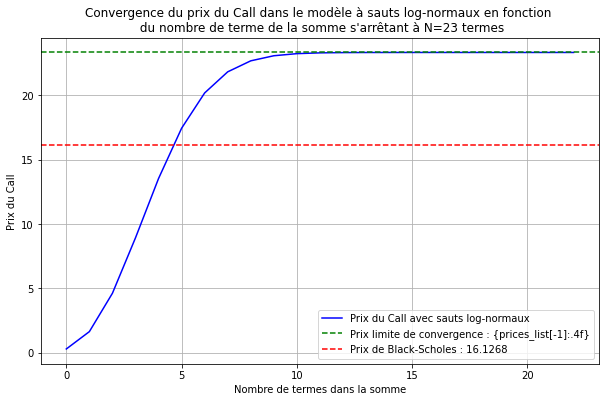

In [13]:
N = 100
prices_list, stop = log_normal_jumps(S0, K, r, T, sigma, Lambda, mu_J, sigma_J, N,threshold=10**(-8))

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(stop)], prices_list, label=f"Prix du Call avec sauts log-normaux", color="blue")
plt.axhline(prices_list[-1], color="green", linestyle="--", label="Prix limite de convergence : {prices_list[-1]:.4f}")
plt.axhline(black_scholes(S0, K, T, r, sigma), color="red", linestyle="--", label=f"Prix de Black-Scholes : {black_scholes(S0, K, T, r, sigma):.4f}")
plt.xlabel("Nombre de termes dans la somme")
plt.ylabel("Prix du Call") 
plt.title(f"Convergence du prix du Call dans le modèle à sauts log-normaux en fonction \n du nombre de terme de la somme s'arrêtant à N={stop} termes")
plt.legend()
plt.grid(True)
plt.show()

On constate ainsi que le prix du Call dans le modèle à sauts log-normaux converge rapidement vers un prix limite. La convergence s'effectue en 23 termes avec une précision de $10^{-8}$. Une condition a été rajoutée à l'algorithme pour que celui-ci arrête d'incrémenter la somme partielle une fois que la précision a été atteinte. 

3. Implémenter le pricing du prix du call dans le modèle avec sauts et vérifier sa convergence vers le prix exact.

In [14]:
def monte_carlo_jumps(S0, K, r, T, sigma, Lambda, mu_J, sigma_J, N):
    Z = np.random.standard_normal(N)
    jumps_poisson = np.random.poisson(Lambda*T, N)
    jumps_log_normal = np.zeros(N)
    beta = np.exp(mu_J+sigma_J**2/2)-1
    for i in range(N):
        jumps_log_normal[i] = sum(np.random.normal(mu_J, sigma_J, size=(jumps_poisson[i])))
    S_T = S0*np.exp(((r - beta*Lambda - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)+jumps_log_normal)
    discounted_payoff = np.exp(-r * T) * np.maximum(S_T - K, 0)
    price = np.mean(discounted_payoff)
    return price

In [15]:
N_theorique = 100
N_MC = 10**7
monte_carlo = monte_carlo_jumps(S0, K, r, T, sigma, Lambda, mu_J, sigma_J, N_MC)
print("Prix avec Monte-Carlo du Call dans le modèle à sauts log-normaux :",monte_carlo)
print("Prix théorique du Call dans le modèle à sauts log-normaux :",log_normal_jumps(S0, K, r, T, sigma, Lambda, mu_J, sigma_J, N_theorique, threshold=10**(-8))[0][-1])
print("Ecart entre les deux prix :",abs(monte_carlo-log_normal_jumps(S0, K, r, T, sigma, Lambda, mu_J, sigma_J, N_theorique, threshold=10**(-8))[0][-1]))

Prix avec Monte-Carlo du Call dans le modèle à sauts log-normaux : 23.31790218865364
Prix théorique du Call dans le modèle à sauts log-normaux : 23.309698002958594
Ecart entre les deux prix : 0.008204185695046107


On constate donc que le modèle calculé par Monte-Carlo converge bien vers le prix calculé théoriquement avec la formule explicite. On peut tracer une évolution du prix de Monte-Carlo en fonction du nombre de simulations pour visualiser cette convergence. 

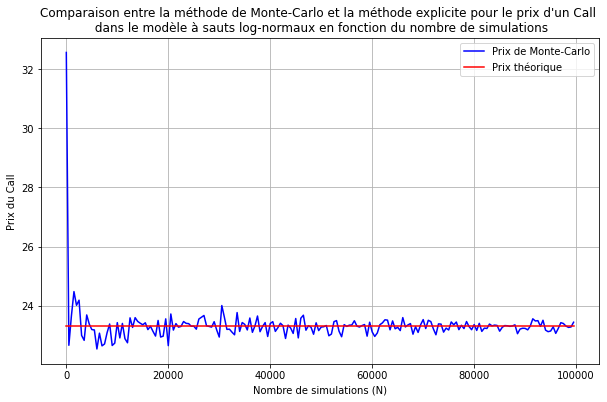

In [16]:
N_values = np.arange(10,100000,500)
plt.figure(figsize=(10, 6))
y_MC=[]
y_theo = []
np.random.seed(42)
for i in range(len(N_values)):
    y_MC.append(monte_carlo_jumps(S0,K,r,T,sigma,Lambda, mu_J, sigma_J, N_values[i]))
    y_theo.append(log_normal_jumps(S0, K, r, T, sigma, Lambda, mu_J, sigma_J, N_theorique, threshold=10**(-8))[0][-1])
plt.plot(N_values,y_MC,'b-', markersize=2, label="Prix de Monte-Carlo")
plt.plot(N_values,y_theo,'r-', markersize=2, label="Prix théorique")
plt.xlabel("Nombre de simulations (N)")
plt.ylabel("Prix du Call")
plt.legend()
plt.grid()
plt.title("Comparaison entre la méthode de Monte-Carlo et la méthode explicite pour le prix d'un Call \n dans le modèle à sauts log-normaux en fonction du nombre de simulations")
plt.show()

4. Tracer le smile de volatilité implicite engendré par le modèle à sauts et analyser. Commenter.

On peut reprendre l'algorithme permettant de calculer la volatilité implicite par la méthode de la dichotomie vue au TP5.

In [17]:
def IV_Call(price,S ,T ,K, r, eps=0.005):
    x0=0;x1=1
    while (x1-x0)/2 > eps:
        x_mid = (x0 + x1) / 2
        sigma = x_mid / (1 - x_mid)
        price_estimate = black_scholes(S,K,T,r,sigma)
        if price_estimate == price:
            return sigma
        elif price_estimate > price:
            x1 = x_mid
        else :
            x0 = x_mid
    return sigma

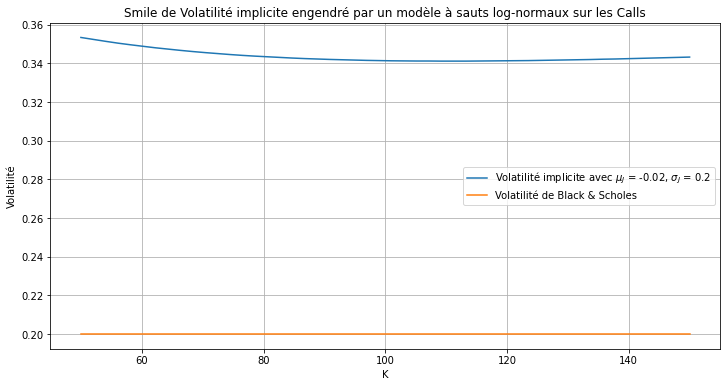

In [18]:
strikes = np.linspace(50, 150, 50)
length = len(strikes)
prices_jumps = [log_normal_jumps(S0, strike, r, T, sigma, Lambda, mu_J, sigma_J, N_theorique, threshold=10**(-8))[0][-1] for strike in strikes]
IV = [IV_Call(prices_jumps[i],S0, T, strikes[i], r, eps=10**(-5)) for i in range(len(prices_jumps))]

plt.figure(figsize=(12, 6))
plt.plot(strikes, IV, label=f'Volatilité implicite avec $\mu_J$ = {mu_J}, $\sigma_J$ = {sigma_J}')
plt.plot(strikes, [sigma]*length,label='Volatilité de Black & Scholes')
plt.ylabel('Volatilité')
plt.xlabel('K')
plt.title('Smile de Volatilité implicite engendré par un modèle à sauts log-normaux sur les Calls')
plt.legend()
plt.grid()
plt.show()

On constate alors que la volatilité implicite du sous-jacent est plus grande que la volatilité dans le modèle de Black & Scholes. La diminution du drift de part la présence du terme $-\tilde{\beta} \tilde{\lambda}$ ne suffit pas à compenser, ce qui explique le prix du Call dans le modèle à sauts log-normaux est supérieur au prix du Call dans le modèle de Black & Scholes. 

Maintenant, si on essaye d'augmenter la valeur du paramètre $\mu_J$ de telle sorte à ce que le drift parvienne à compenser l'augmentation de la volatilité dûe à la présence des sauts, on obtient les résults suivants :

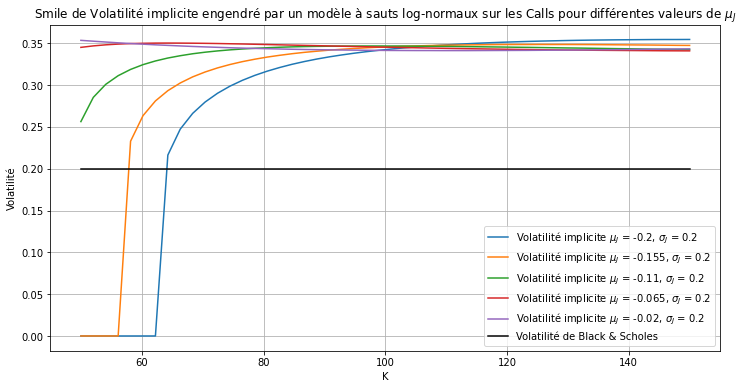

In [21]:
mu_values = np.linspace(-0.2, -0.02, 5)
colors = plt.get_cmap("tab10").colors
plt.figure(figsize=(12, 6))

for j in range(len(mu_values)):
    prices_jumps = [log_normal_jumps(S0, strike, r, T, sigma, Lambda, mu_values[j], sigma_J, N_theorique, threshold=10**(-8))[0][-1] for strike in strikes]
    IV = [IV_Call(prices_jumps[i],S0, T, strikes[i], r, eps=10**(-5)) for i in range(len(prices_jumps))]
    plt.plot(strikes, IV, color =colors[j%len(colors)], label=f'Volatilité implicite $\mu_J$ = {mu_values[j]}, $\sigma_J$ = {sigma_J}')
plt.plot(strikes, [sigma]*length,color = 'k',label='Volatilité de Black & Scholes')
plt.ylabel('Volatilité')
plt.xlabel('K')
plt.title(f'Smile de Volatilité implicite engendré par un modèle à sauts log-normaux sur les Calls pour différentes valeurs de $\mu_J$')
plt.legend()
plt.grid()
plt.show()

Ainsi, on se rend compte que plus on diminue la valeur de $\mu_J$, et plus le drift va venir compenser la volatilité implicite du Call dans le modèle à sauts. Pour des valeurs faibles du strike, cette diminution du drift l'emporte et amène même la volatitlité implicite à 0, ce qui signifie que le Call sera presque sûrement In The Money (la probabilité qu'il le soit sera égale à 1). 